In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [9]:
print(os.getcwd())
os.chdir(r"..\..\..\Downloads")
print(os.getcwd())

C:\Users\Zachary Brown\Downloads


FileNotFoundError: [WinError 2] The system cannot find the file specified: '..\\..\\..\\Downloads'

In [10]:
data = pd.read_csv('Health_AnimalBites.csv')
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [11]:
for col in data.columns:
    print(data[col].value_counts())

2017-08-15 00:00:00    13
2010-04-01 00:00:00    12
2015-03-17 00:00:00    12
2014-04-26 00:00:00    12
2014-05-03 00:00:00    11
                       ..
2016-12-06 00:00:00     1
2015-06-13 00:00:00     1
2016-10-06 00:00:00     1
2016-09-21 00:00:00     1
1985-05-05 00:00:00     1
Name: bite_date, Length: 2702, dtype: int64
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64
PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64
MALE       3832
FEMALE     2016
UNKNOWN     629
Name: GenderIDDesc, dtype: int64
BLACK         671
BROWN         433
WHITE         394
BLK WHT       277
TAN           223
            

In [12]:
data = data.dropna(axis = 0, subset = 'SpeciesIDDesc')

In [13]:
data[data['SpeciesIDDesc'] == 'DOG']['ResultsIDDesc'].value_counts()

UNKNOWN     979
NEGATIVE     58
POSITIVE      1
Name: ResultsIDDesc, dtype: int64

In [14]:
data['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

In [15]:
percent_pos = {}

for species in data['SpeciesIDDesc'].unique():
    animal = data[data['SpeciesIDDesc'] == species]
    percent_pos[species] = (animal['ResultsIDDesc'] == 'POSITIVE').sum() / len(animal) *100
    
print(percent_pos)

{'DOG': 0.014226774790155071, 'CAT': 0.0, 'BAT': 1.2658227848101267, 'RACCOON': 0.0, 'OTHER': 0.0, 'RABBIT': 0.0, 'HORSE': 0.0, 'SKUNK': 0.0, 'FERRET': 0.0}


[]

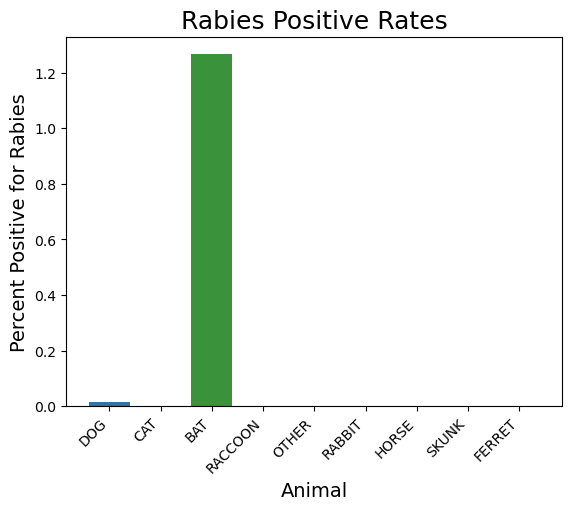

In [16]:
percent_pos = pd.DataFrame(percent_pos, index=percent_pos.keys())
sns.barplot(percent_pos)
plt.ylabel('Percent Positive for Rabies', size = 14)
plt.xlabel('Animal', size = 14)
plt.title('Rabies Positive Rates', size = 18)
plt.xticks(rotation=45, ha='right')
plt.plot()

In [17]:
data['SpeciesIDDesc'].value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

In [18]:
data['SpeciesIDDesc'].value_counts(normalize=True)

DOG        0.791109
CAT        0.176477
BAT        0.026674
RACCOON    0.003039
OTHER      0.001238
HORSE      0.000563
FERRET     0.000450
RABBIT     0.000338
SKUNK      0.000113
Name: SpeciesIDDesc, dtype: float64

In [19]:
vals = data['SpeciesIDDesc'].value_counts(normalize=True).values
labs = data['SpeciesIDDesc'].value_counts(normalize=True).index
labs

Index(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'HORSE', 'FERRET', 'RABBIT',
       'SKUNK'],
      dtype='object')

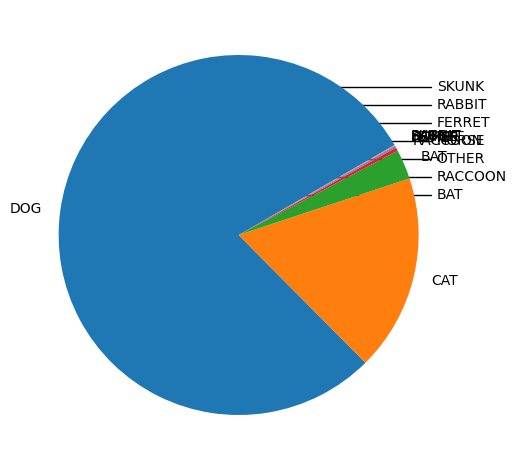

In [21]:
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(arrowprops=arrowprops, zorder=0)
fig, ax = plt.subplots()
patches, texts = ax.pie(vals, labels=labs, startangle=30)
plt.gca().annotate('SKUNK', xy=(0, 0), xytext=(1.1, 0.8), **kw )
plt.gca().annotate('RABBIT', xy=(0, 0), xytext=(1.1, 0.7), **kw )
plt.gca().annotate('FERRET', xy=(0, 0), xytext=(1.1, 0.6), **kw )
plt.gca().annotate('HORSE', xy=(0, 0), xytext=(1.1, 0.5), **kw )
plt.gca().annotate('OTHER', xy=(0, 0), xytext=(1.1, 0.4), **kw )
plt.gca().annotate('RACCOON', xy=(0, 0), xytext=(1.1, 0.3), **kw )
plt.gca().annotate('BAT', xy=(0, 0), xytext=(1.1, 0.2), **kw )

plt.tight_layout()
plt.show()

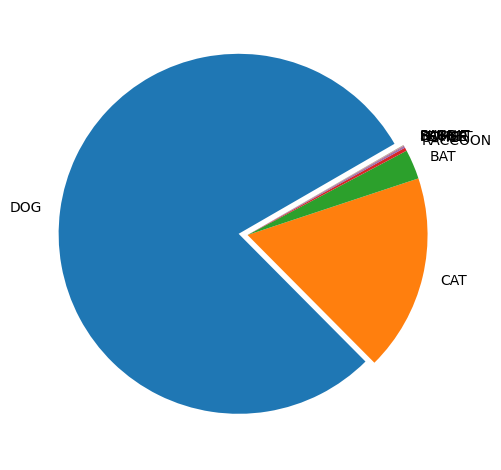

In [22]:
fig, ax = plt.subplots()
ax.pie(vals, labels=labs, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0], startangle=30)
plt.tight_layout()
plt.show()

[]

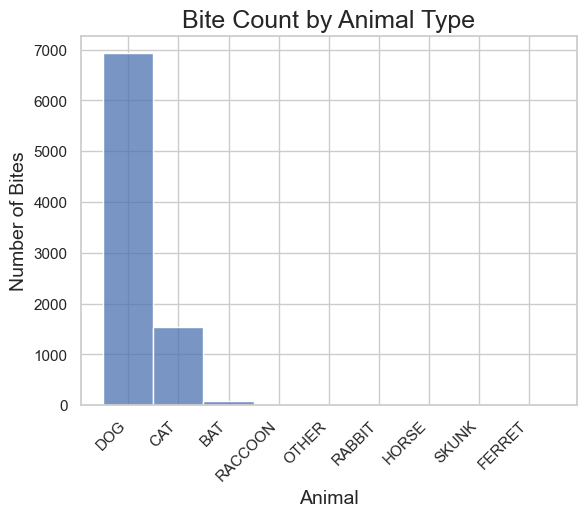

In [145]:
sns.histplot(data['SpeciesIDDesc'])
plt.ylabel('Number of Bites', size = 14)
plt.xlabel('Animal', size = 14)
plt.title('Bite Count by Animal Type', size = 18)
plt.xticks(rotation=45, ha='right')
plt.savefig('bite count by animal type.png', bbox_inches='tight')
plt.plot()

In [24]:
data['BreedIDDesc'].value_counts()

PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

In [25]:
dogs = data[data['SpeciesIDDesc'] == 'DOG']

In [26]:
dogs['WhereBittenIDDesc'].value_counts()

BODY       4909
HEAD       1184
UNKNOWN     637
Name: WhereBittenIDDesc, dtype: int64

In [27]:
data['WhereBittenIDDesc'].value_counts()

BODY       6165
HEAD       1237
UNKNOWN     908
Name: WhereBittenIDDesc, dtype: int64

In [28]:
data[data['SpeciesIDDesc'] == 'RACCOON']['WhereBittenIDDesc'].value_counts(normalize=True)

BODY       0.894737
UNKNOWN    0.105263
Name: WhereBittenIDDesc, dtype: float64

In [29]:
labels = ['Total']
heads = [data['WhereBittenIDDesc'].value_counts(normalize=True)['HEAD']]
bodies = [data['WhereBittenIDDesc'].value_counts(normalize=True)['BODY']]
unknown = [data['WhereBittenIDDesc'].value_counts(normalize=True)['UNKNOWN']]
for species in data['SpeciesIDDesc'].unique():
    labels.append(species)
    if 'HEAD' in data[data['SpeciesIDDesc'] == species]['WhereBittenIDDesc'].value_counts(normalize=True):
        heads.append(data[data['SpeciesIDDesc'] == species]['WhereBittenIDDesc'].value_counts(normalize=True)['HEAD'])
    else:
        heads.append(0)
    bodies.append(data[data['SpeciesIDDesc'] == species]['WhereBittenIDDesc'].value_counts(normalize=True)['BODY'])
    if 'UNKNOWN' in data[data['SpeciesIDDesc'] == species]['WhereBittenIDDesc'].value_counts(normalize=True):
        unknown.append(data[data['SpeciesIDDesc'] == species]['WhereBittenIDDesc'].value_counts(normalize=True)['UNKNOWN'])
    else:
        unknown.append(0)

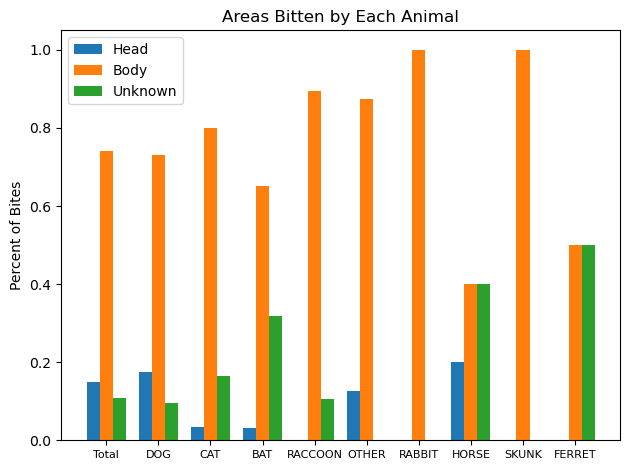

In [30]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width), heads, width, label='Head')
rects2 = ax.bar(x, bodies, width, label='Body')
rects3 = ax.bar(x + (width), unknown, width, label='Unknown')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Bites')
ax.set_title('Areas Bitten by Each Animal', )
ax.set_xticks(x, labels, fontsize=8)
ax.legend()

fig.tight_layout()

plt.show()

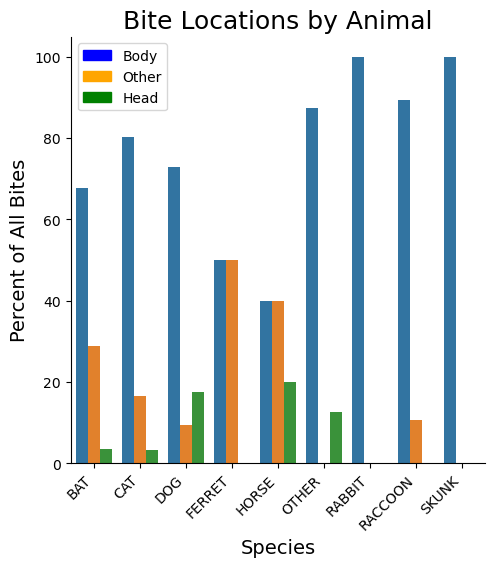

In [87]:
import matplotlib.patches as mpatches

data.groupby('SpeciesIDDesc')['WhereBittenIDDesc'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()\
.pipe((sns.catplot,'data'), x='SpeciesIDDesc',y='Percent',hue='WhereBittenIDDesc',kind='bar', legend=False)
blue_patch = mpatches.Patch(color='blue', label='Body')
orange_patch = mpatches.Patch(color='orange', label='Other')
green_patch = mpatches.Patch(color='green', label='Head')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Species', fontsize=14)
plt.ylabel('Percent of All Bites', fontsize=14)
plt.legend(handles=[blue_patch, orange_patch, green_patch], loc='best')
plt.title('Bite Locations by Animal', fontsize=18)
plt.savefig('bite location by animal type.png', bbox_inches='tight')
plt.show()

In [31]:
dogs['BreedIDDesc'].value_counts()

PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

In [32]:
v = dogs['BreedIDDesc'].value_counts()
common_dogs = dogs[dogs['BreedIDDesc'].isin(v.index[v.gt(30)])]

[]

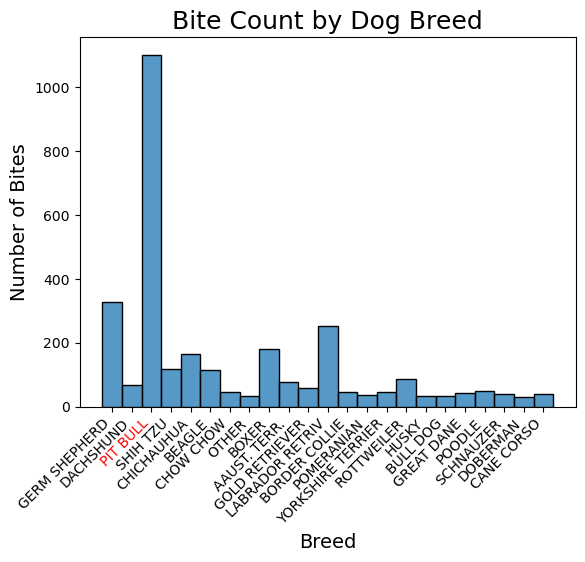

In [33]:
fig, ax = plt.subplots()
sns.histplot(common_dogs['BreedIDDesc'])
plt.ylabel('Number of Bites', size = 14)
plt.xlabel('Breed',size = 14)
plt.title('Bite Count by Dog Breed', size = 18)
plt.xticks(rotation=45, ha='right')
ax.get_xticklabels()[2].set_color("red")
plt.savefig('bite count by dog breed.png', bbox_inches='tight')
plt.plot()

In [34]:
data['GenderIDDesc'].value_counts()

MALE       3831
FEMALE     2014
UNKNOWN     627
Name: GenderIDDesc, dtype: int64

In [35]:
data[data['bite_date'] > '2022']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1512,2101-02-18 00:00:00,CAT,NaN,FEMALE,BLACK,NaN,NaN,40202,NaN,BODY,2011-02-18 00:00:00,RELEASED,NaN,NaN,NaN
4490,5013-07-15 00:00:00,DOG,GERM SHEPHERD,FEMALE,WHITE,1.0,2013-08-05 00:00:00,40216,NaN,BODY,NaN,NaN,NaN,NaN,NaN
5055,2201-01-21 00:00:00,CAT,NaN,MALE,GRAY,NaN,NaN,NaN,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
6293,2201-02-21 00:00:00,DOG,PIT BULL,MALE,TAN WHITE,1.0,2015-04-21 00:00:00,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
6505,2201-05-01 00:00:00,DOG,DACHSHUND,MALE,BROWN,1.0,2015-05-19 00:00:00,40229,NO,BODY,NaN,RELEASED,NaN,2015-05-11 00:00:00,NaN


In [36]:
data = data[data['bite_date'] <= '2022']
dogs = dogs[dogs['bite_date'] <= '2022']

In [37]:
data['ResultsIDDesc'].value_counts()

UNKNOWN     1235
NEGATIVE     131
POSITIVE       2
Name: ResultsIDDesc, dtype: int64

In [38]:
data['bite_date'] = pd.to_datetime(data['bite_date'])
data['head_sent_date'] = pd.to_datetime(data['head_sent_date'])
data['vaccination_date'] = pd.to_datetime(data['vaccination_date'])
data['quarantine_date'] = pd.to_datetime(data['quarantine_date'])

In [39]:
dogs['bite_date'] = pd.to_datetime(dogs['bite_date'])
dogs['head_sent_date'] = pd.to_datetime(dogs['head_sent_date'])
dogs['vaccination_date'] = pd.to_datetime(dogs['vaccination_date'])
dogs['quarantine_date'] = pd.to_datetime(dogs['quarantine_date'])

In [40]:
data['bite_to_test'] = data['head_sent_date'] - data['bite_date']
dogs['bite_to_test'] = dogs['head_sent_date'] - dogs['bite_date']

In [41]:
data['bite_to_test'].value_counts()

0 days       108
1 days        45
2 days        24
3 days         9
4 days         7
5 days         7
7 days         6
6 days         4
10 days        3
9 days         2
-2 days        1
-4 days        1
1096 days      1
369 days       1
-5 days        1
Name: bite_to_test, dtype: int64

In [42]:
dogs = dogs[dogs['bite_to_test'] >= '0 days']

In [43]:
dogs['bite_to_test'] = pd.to_numeric(dogs['bite_to_test'].dt.days, downcast='integer')

In [44]:
dogs.groupby(['BreedIDDesc']).mean()['bite_to_test']

BreedIDDesc
AAUST. TERR.          0.000000
AMER. BULL DOG        3.000000
BEAGLE                3.000000
BORDER COLLIE         1.000000
BOXER                 0.000000
BULL DOG              0.000000
CHOW CHOW             6.000000
DACHSHUND             0.000000
DALMATIAN             7.000000
GERM SHEPHERD         2.000000
GOLD RETRIEVER        5.000000
GREAT PYRENEESE       2.000000
HUSKY                 0.000000
LABRADOR RETRIV       4.000000
MASTIF                7.000000
PIT BULL             82.444444
SHIH TZU              2.000000
YORKSHIRE TERRIER     0.000000
Name: bite_to_test, dtype: float64

In [45]:
dogs['bite_to_test'].mean()

17.221052631578946

In [46]:
data['BreedIDDesc'].value_counts()

PIT BULL           1080
GERM SHEPHERD       323
LABRADOR RETRIV     248
BOXER               181
CHICHAUHUA          164
                   ... 
BESINJI               1
BEARDED COLLIE        1
STAN POODLE           1
AMER FOX HOUND        1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

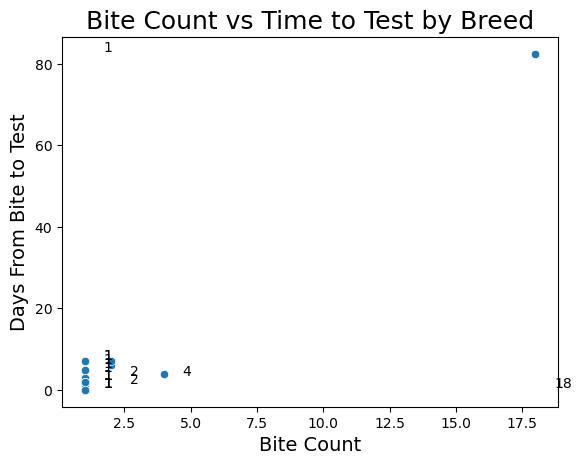

In [47]:
sns.scatterplot(dogs, x=dogs['BreedIDDesc'].value_counts(), y=dogs.groupby(['BreedIDDesc']).mean()['bite_to_test'])
for i, breed in enumerate (dogs['BreedIDDesc'].value_counts()):
    plt.annotate(breed, (dogs['BreedIDDesc'].value_counts()[i]+0.7, dogs.groupby(['BreedIDDesc']).mean()['bite_to_test'][i]+0.5) )

plt.xlabel('Bite Count', size = 14)
plt.ylabel('Days From Bite to Test', size = 14)
plt.title('Bite Count vs Time to Test by Breed', size = 18)
plt.show()

In [49]:
data['day_of_week'] = data['bite_date'].dt.day_name()

In [51]:
data['day_of_week'].value_counts()

Saturday     1384
Tuesday      1255
Sunday       1245
Friday       1203
Thursday     1192
Monday       1180
Wednesday    1121
Name: day_of_week, dtype: int64

In [52]:
dogs['day_of_week'] = dogs['bite_date'].dt.day_name()

In [106]:
weekday_bites = data[data['SpeciesIDDesc'] == 'DOG']['day_of_week'].value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

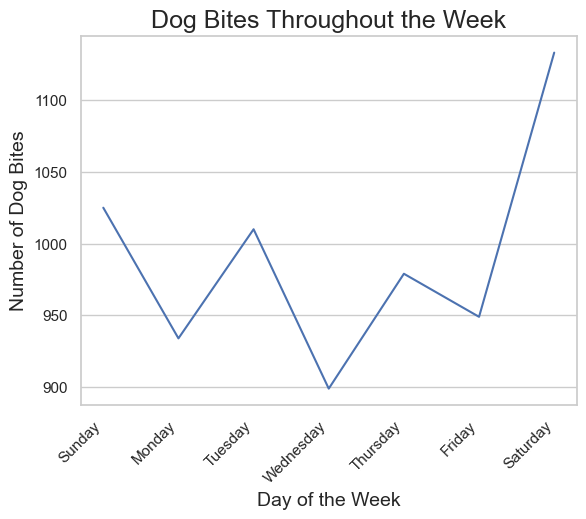

In [147]:
fig, ax = plt.subplots()
weekday_bites.plot.line()
plt.grid(axis='x')
ax.set_axisbelow(b=True)
plt.ylabel('Number of Dog Bites', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Dog Bites Throughout the Week', fontsize=18)
plt.savefig('bites through the week.png', bbox_inches='tight')
plt.show()

In [117]:
data.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc', 'bite_to_test',
       'day_of_week'],
      dtype='object')

In [118]:
data['bite_year'] = data['bite_date'].dt.year

In [122]:
data.groupby('bite_year').count()['bite_date']

bite_year
1952       2
1985       1
1986       1
1987       1
1988       1
1989       2
1990       6
1991       5
1992      10
1993       6
1994       7
1995       1
1999       1
2001       1
2002       1
2007       1
2009      14
2010    1131
2011    1144
2012    1133
2013    1133
2014    1155
2015     978
2016    1049
2017     793
2018       1
2020       1
2021       1
Name: bite_date, dtype: int64

In [133]:
years = data[data['bite_year'] > 2009]
years = years[years['bite_year'] < 2017]

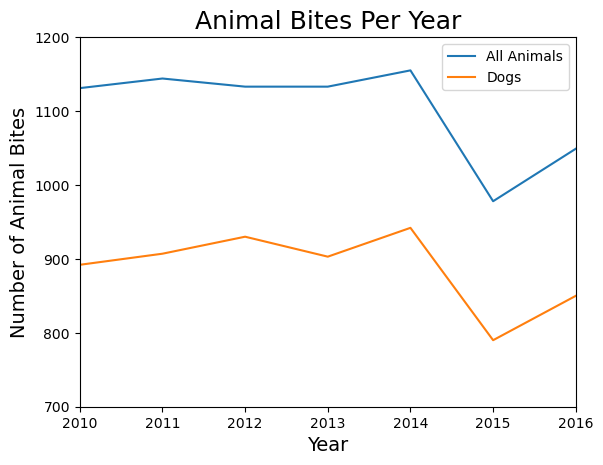

In [141]:
years.groupby('bite_year').count()['bite_date'].plot.line(label='All Animals')
years[years['SpeciesIDDesc'] == 'DOG'].groupby('bite_year').count()['bite_date'].plot.line(label='Dogs')
plt.ylim(700, 1200)
plt.xlim(2010, 2016)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Animal Bites', fontsize=14)
plt.title('Animal Bites Per Year', fontsize=18)
plt.legend()
plt.savefig('bites per year.png', bbox_inches='tight')
plt.show()